In [1]:
#importing all required library
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
df = pd.read_csv('Property Price - Sheet1.csv') # reading the file

In [3]:
df#priting the dataframe 

,Address,Asking Value,Assesed Value,Built Year,Lot Size,Property Type
0,401-2125 Osler Street,"$79,900.00","$123,100.00",1986,0,Multi-Family
1,1729 York Street,"$25,800.00","$123,100.00",1914,3001,Residential
2,601 E Broadway Avenue,"$359,900.00","$244,300.00",1956,7377,Residential
3,6930 Maple Vista Drive,"$799,900.00","$518,900.00",2015,9328,Residential
4,220 Durham Drive,"$309,900.00","$233,100.00",1958,6815,Residential
5,19-2157 Rae Street,"$69,900.00","$61,800.00",1967,0,Multi-Family
6,1072 Montague Street,"$149,900.00","$68,300.00",1924,3126,Residential
7,2544 Mackay Street,"$239,900.00","$194,400.00",1952,6250,Residential
8,121 Chisholm Road,"$320,000.00","$241,800.00",1962,6102,Residential
9,104-2315 Cornwall Street,"$199,900.00","$218,000.00",1990,0,Multi-Family


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Address        29 non-null     object
 1   Asking Value   29 non-null     object
 2   Assesed Value  29 non-null     object
 3   Built Year     29 non-null     int64 
 4   Lot Size       29 non-null     int64 
 5   Property Type  29 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.5+ KB


# Cleaning data

In [5]:
# removing $ from the coluns for asking value and assesed value
convert = []

a = df['Asking Value']
for i in a:
    convert.append(i[1:])
df['Asking Value'] = convert
#print(df['Asking Value'])


In [6]:
convert1 =[]
b = df['Assesed Value']
for i in b:
    convert1.append(i[1:])
df['Assesed Value'] = convert1
#print(df['Assesed Value'])

In [7]:
df['Assesed Value']=df['Assesed Value'].replace(regex=[','],value='')#replacing , with empty space
df['Asking Value']=df['Asking Value'].replace(regex=[','],value='')#replacing , with empty space

In [8]:
df['Assesed Value'] = df['Assesed Value'].astype(str).astype(float) #converting string to float
df['Asking Value'] = df['Asking Value'].astype(str).astype(float) #converting string to float

# Plotting linear regression line using matplotlib and seaborn

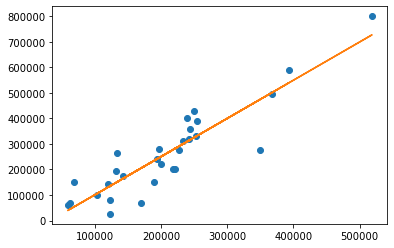

In [9]:
#plotting the linear regression line using matplotlib
import matplotlib.pyplot as plt
y = df['Asking Value']
x = df['Assesed Value']
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

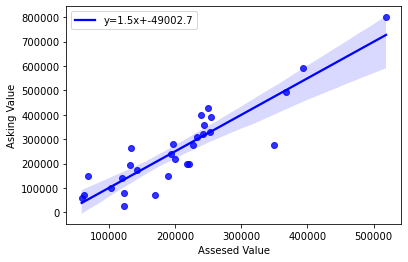

In [10]:
# plotting linear regression using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Assesed Value'],df['Asking Value'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Assesed Value", y="Asking Value", data=df, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

# Plotting Multiple linear regression using seaborn

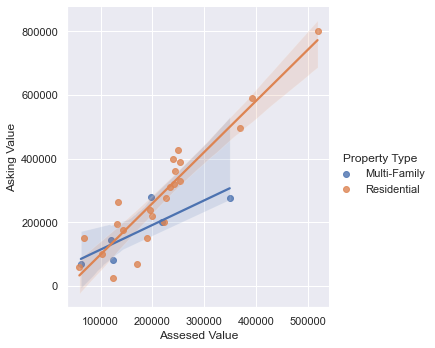

In [11]:
# setting up seaborn for plot
sns.set_theme()

#PLot asseses value and asking value across property type
g = sns.lmplot(
    data=df,
    x="Assesed Value", y="Asking Value", hue="Property Type",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Assesed Value", "Asking Value")

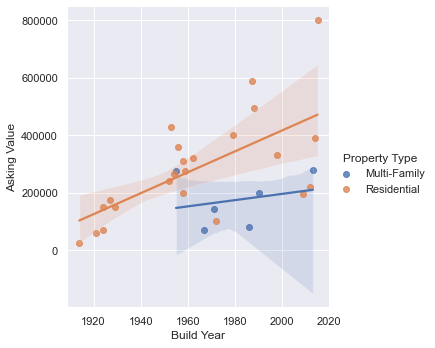

In [99]:
# setting up seaborn for plot
sns.set_theme()

#PLot asseses value and asking value across property type
g = sns.lmplot(
    data=df,
    x="Built Year", y="Asking Value", hue="Property Type",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Build Year", "Asking Value")

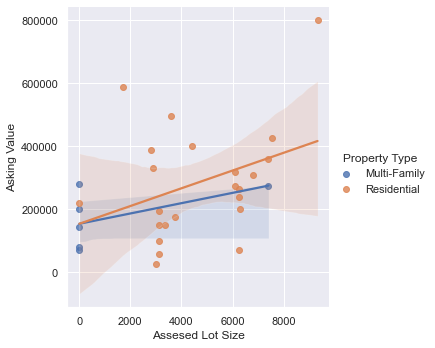

In [102]:
# setting up seaborn for plot
sns.set_theme()

#PLot asseses value and asking value across property type
g = sns.lmplot(
    data=df,
    x="Lot Size", y="Asking Value", hue="Property Type",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Assesed Lot Size", "Asking Value")

# MLR model

In [14]:
# getting dummy values for Property Type
df_Property = pd.get_dummies(df['Property Type'])
df_new = pd.concat([df, df_Property], axis=1)
df_new = df_new.drop(['Property Type'], axis=1)
df_new

,Address,Asking Value,Assesed Value,Built Year,Lot Size,Multi-Family,Residential
0,401-2125 Osler Street,79900.0,123100.0,1986,0,1,0
1,1729 York Street,25800.0,123100.0,1914,3001,0,1
2,601 E Broadway Avenue,359900.0,244300.0,1956,7377,0,1
3,6930 Maple Vista Drive,799900.0,518900.0,2015,9328,0,1
4,220 Durham Drive,309900.0,233100.0,1958,6815,0,1
5,19-2157 Rae Street,69900.0,61800.0,1967,0,1,0
6,1072 Montague Street,149900.0,68300.0,1924,3126,0,1
7,2544 Mackay Street,239900.0,194400.0,1952,6250,0,1
8,121 Chisholm Road,320000.0,241800.0,1962,6102,0,1
9,104-2315 Cornwall Street,199900.0,218000.0,1990,0,1,0


In [23]:
import pandas
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df_new[['Assesed Value', 'Built Year','Lot Size','Multi-Family','Residential']]
y = df_new['Asking Value']

x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)



regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

predicted = regr.predict(x_test)

print(predicted)

[352911.15497003  -5324.376828   112164.7665229   15786.13930127
 228086.93713794 286046.06322288]


In [24]:
regr.score(X, y) # this the score for MLR

0.84836815044336

# Linear regression model

In [94]:
X = np.array(df['Assesed Value']).reshape((-1, 1))
y = np.array(df['Asking Value'])


In [95]:
X.shape, y.shape

((29, 1), (29,))

In [96]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [97]:
predicted = regr.predict([[352911.15]])

print(predicted)

[478855.09087309]


In [98]:
regr.score(X, y)# this the score for LR

0.8150010339653605